# R-CNN


- Combining region proposals with CNN's


- R-CNN이 해결하려는 문제
    - 이미지내의 물체의 위치를 찾는것.
        
        - 이를 위해서 고전적으로 Sliding Window approach 알고리즘이 있다. (매우 비효율적)
        
        
- Sliding Window를 대신해서 Region Proposal 방법을 사용.
    - Region Porposal: 물체가 있을 것 같은 지역을 추천해주는 알고리즘
        - bounding box와는 상관없이 normal한 알고리즘으로, 훈련시킬 필요가없다.
        
        
- R-CNN은 물체를 찾는 알고리즘으로 Selective search 알고리즘을 사용

### Region Proposals Algorithms

- input: 이미지

- output: bounding boxes corresponding to all patches in the image
    - 수천 개의 bounding box가 생성되지만 sliding window보다 더 좋은 방법이다.
    - output으로 나온 bounding box들은 noisy하고, 박스들끼리 overlapping되있으며 물체를 포함하고 있지 않을 수도 있다.
    
- proposed된 regions들을 object recognition model을 사용해서 분류한다.
    - 가장 높은 확률을 갖고있는 region proposal들이 그 물체의 위치이다.

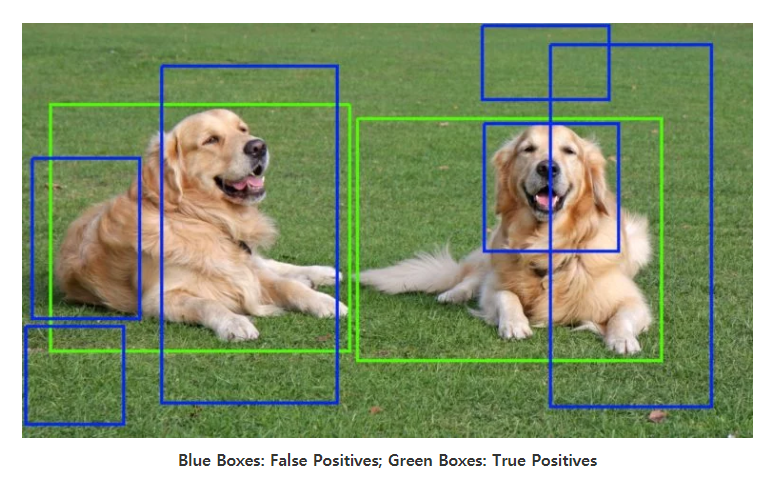

- Region proposal 방법의 가장 중요한 속성은 `Very High Recall`을 갖고있는 것.

    - Region proposal 알고리즘이 매우 많은 false positives를 생성할 것인데, 그 많은 박스들 중에 True positives가 잡혀있기마 하면 괜찮다.
        - 대부분의 FP박스들은 object recognition 알고리즘으로 rejected 당할 것 이기때문.

#### Region proposal 알고리즘의 종류

1. Objectness  
2. Constrained Parametric Min-Cuts for Automatic Object Segmentation  
3. Category Independent Object Proposals
4. Randomized Prim
5. ``Selective Search``; Most commonly used cuz 빠른 속도, High Recall

### CNN (feature extractor ! Not classifier)

- 다음으로, each region proposal을 받아들이고, 해당 이미지를 표현하는 feature vector를 생성한다.

- feature vector를 생성할 때 CNN을 사용하며 그 결과는 훨씬 작은 차원을 갖고있다.

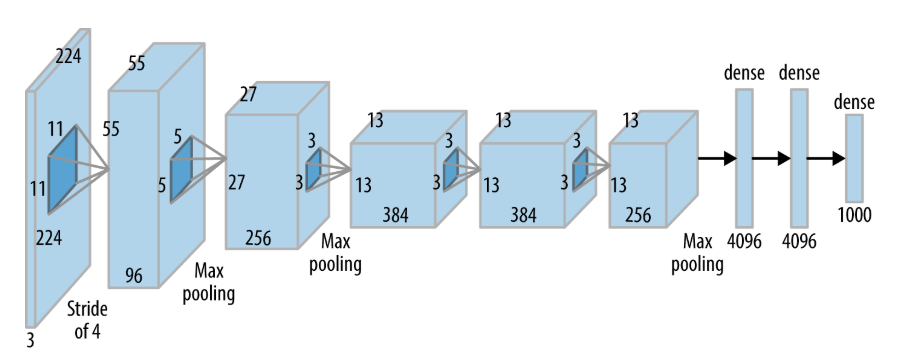

#### Note!
- CNN이 region proposal에 대해서 feature extractor로 사용되기 때문에 이전에 학습이 되어있어야한다. (Not classifier이다)
    - 학습 시, 마지막 softmax를 없애고 위의 Dense layer를 이어준다.
    
    
    
- CNN 구조는 input 데이터의 shape으로 항상 같은 크기(227, 227, 3 -in paper)를 받아야한다.
    - 각 proposal들은 각기 다른 크기를 갖고 있더라도 그렇다.

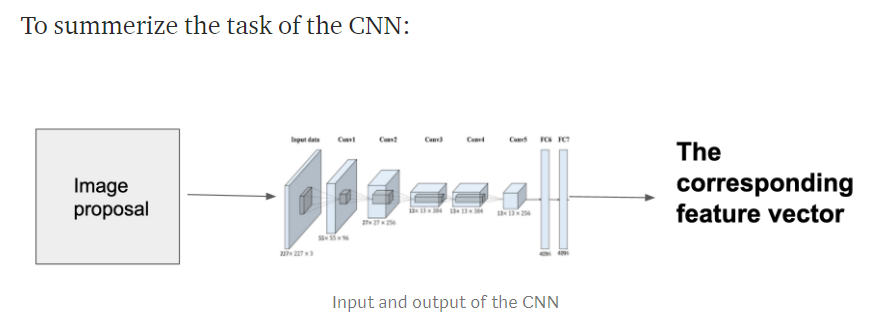

### SVM (classifier)

- CNN으로 생성된 feature vector를 분류해야한다.
    - 이때, SVM을 사용
    
- 각각의 물체(class)에 해당하는 SVM classifier가 하나씩 존재.
    - 즉 10개의 물체를 detection 하려면, 10개의 svm이 존재
    
    
- 1개의 feature vector에 대해서 10개의 SVM이 분류하고 confidence score를 output으로 내보낸다.
    - confidence score는 예측 확률이겠지.
    
    
> 우선 CNN을 학습시킨 후, Selective Search로 proposals을 생성  
학습된 CNN의 구조를 변경하여 feature vector를 생성  
class 갯수 만큼의 SVM을 만들어 feature vector로 학습 후 분류

### The output (from SVM)

- SVM classifier들에 의해 분류된 image proposal들이 있다.


- 이제 어떻게 그 image proposals들을 다시 이미지로 바꿀 것인가?
    - 이 경우 non-maximum suppression을 사용한다.
        - non-maximum suppression: 만약 하나의 region(proposal)이 높은 socre를 갖고있는 지역과 IOU를 갖고있을 경우 그 region은 reject한다.
        
    - 즉, overlap되있는 proposal들에 대해서 svm에 의해 정해진 confidence score를 따져 더 높은 쪽으로 combine시킨다.
        - 해당 과정을 모든 object class에 대해서 독립적으로 진행. -> 결과 남아있는 regions들은 0.5보다 높은 score를 갖고있다.

### Bounding Box가 추가될 수 있다(optional)

#### REFERENCE

1. https://towardsdatascience.com/r-cnn-3a9beddfd55a
2. https://www.learnopencv.com/selective-search-for-object-detection-cpp-python/